In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import glob
import os

<IPython.core.display.Javascript object>


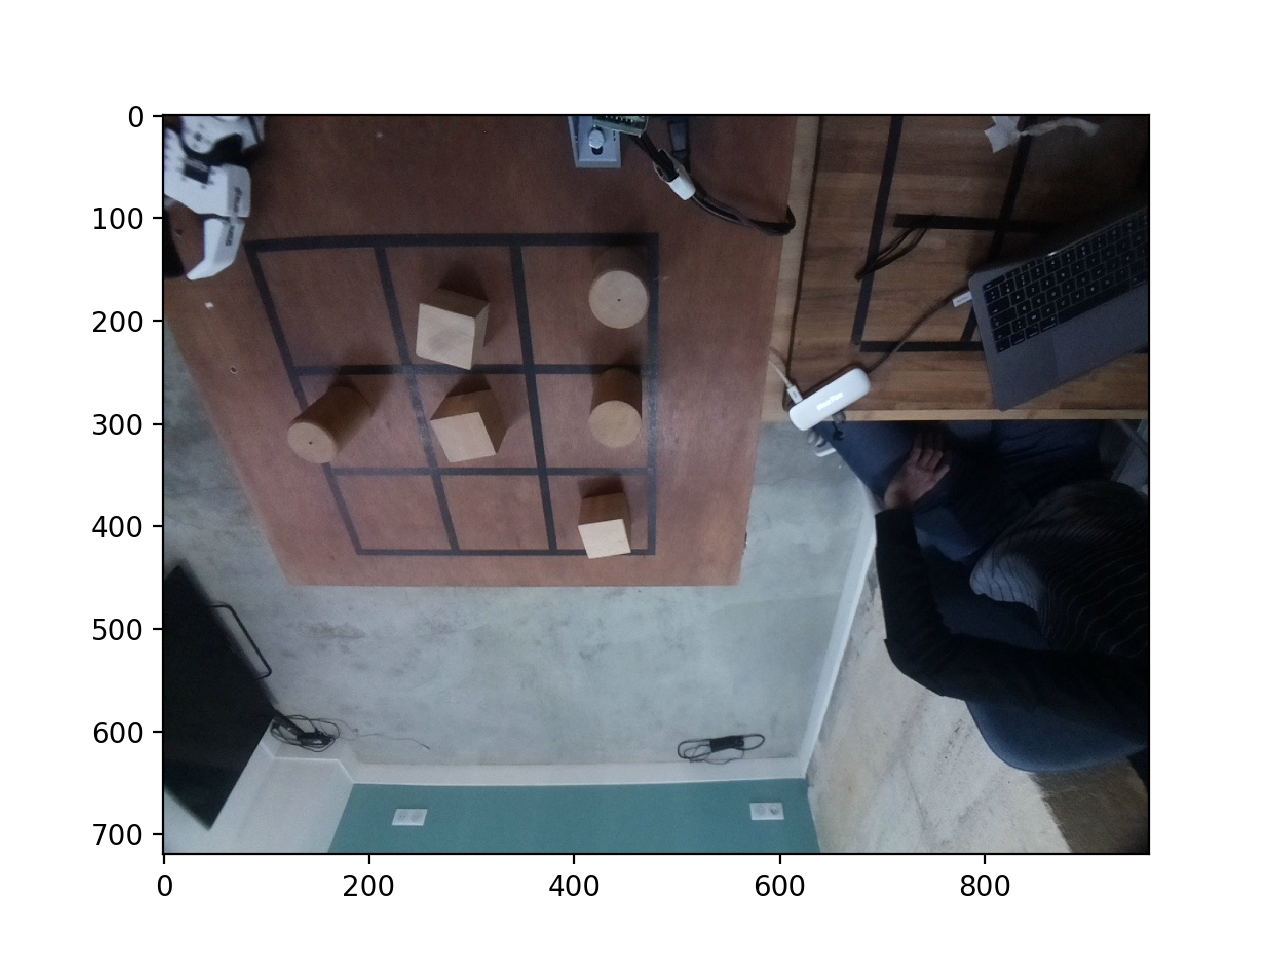

In [2]:
img = cv.imread(os.path.expanduser('/Users/pierrerouanet/Dataset/ttt-tuto/board-all/img.1571930896.3456395.jpg'))

plt.figure()
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [3]:
boxes = np.array((
    ((120, 250, 90, 220),
     (120, 250, 220, 350),
     (120, 250, 350, 480),),

    ((250, 350, 120, 250),
     (250, 350, 250, 365),
     (250, 350, 365, 480),),

    ((350, 430, 160, 280),
     (350, 430, 280, 380),
     (350, 430, 380, 480),),
))

<IPython.core.display.Javascript object>


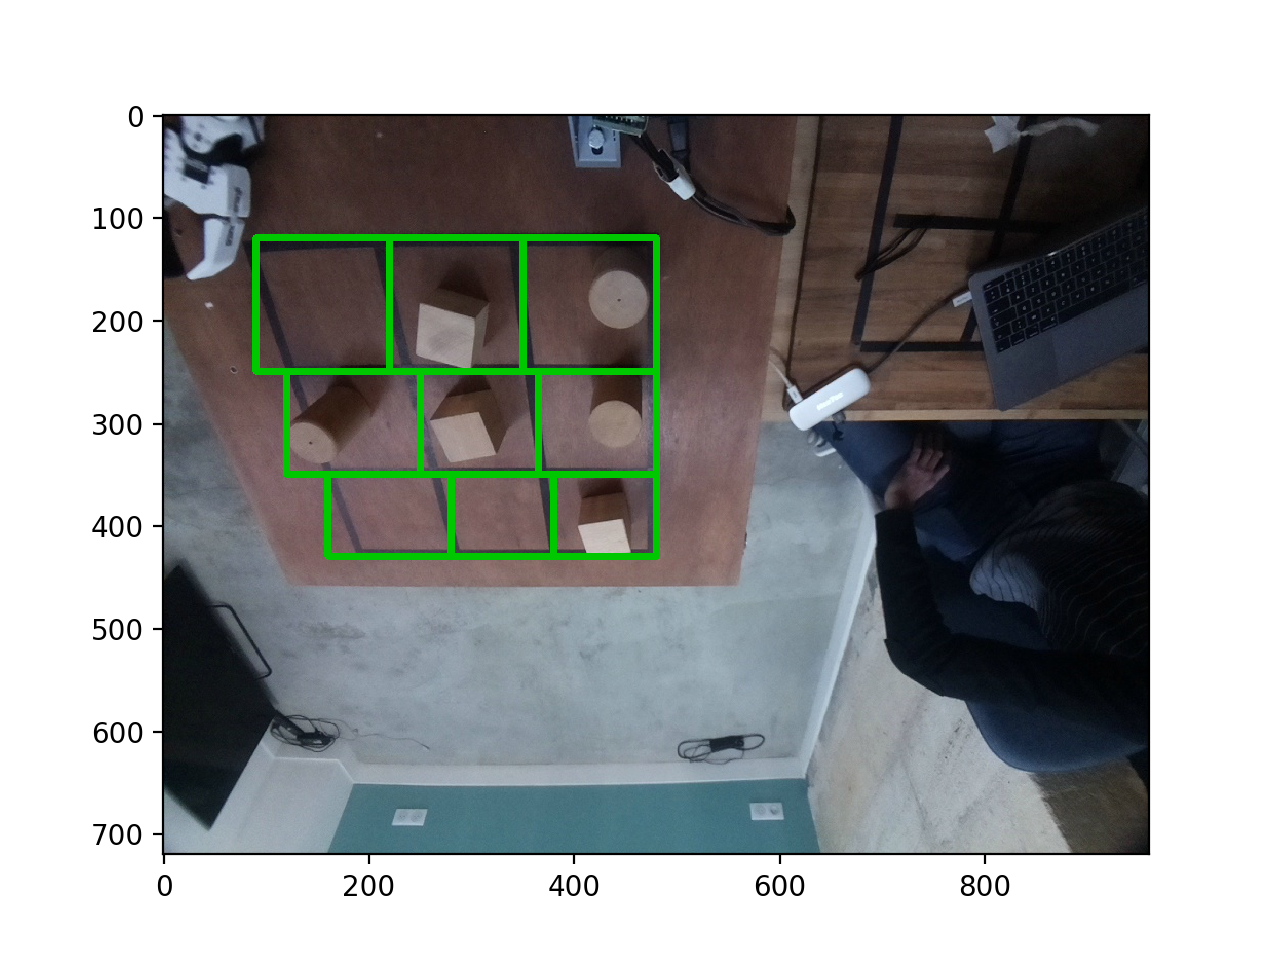

In [4]:
plt.figure()
box_img = img.copy()

for row in range(3):
    for col in range(3):
        ly, ry, lx, rx = boxes[row, col]
        cv.rectangle(box_img, (lx, ly), (rx, ry), (0, 200, 0), 5)
plt.imshow(cv.cvtColor(box_img, cv.COLOR_BGR2RGB))

In [12]:
#_, axes = plt.subplots(3, 3)

i = 1

imgs = glob.glob(os.path.expanduser('~/Dataset/ttt-tuto/board-all/img.*.jpg'))

for path in imgs:
    img = cv.imread(path)
    
    for row in [0, 1, 2]:
        for col in [0, 1, 2]:
            ly, ry, lx, rx = boxes[row, col]
            box = img[ly:ry, lx:rx]
            box = cv.resize(box, (128, 128))
            box = cv.flip(box, 0)
            #axes[row][col].imshow(cv.cvtColor(box, cv.COLOR_BGR2RGB))

            cv.imwrite(os.path.expanduser(f'~/Dataset/ttt-tuto/board-boxes/all/box_{i}.jpg'), box)

            i += 1

~/Dataset/ttt-tuto/board-boxes/all/box_1.jpg
~/Dataset/ttt-tuto/board-boxes/all/box_2.jpg
~/Dataset/ttt-tuto/board-boxes/all/box_3.jpg
~/Dataset/ttt-tuto/board-boxes/all/box_4.jpg
~/Dataset/ttt-tuto/board-boxes/all/box_5.jpg
~/Dataset/ttt-tuto/board-boxes/all/box_6.jpg
~/Dataset/ttt-tuto/board-boxes/all/box_7.jpg
~/Dataset/ttt-tuto/board-boxes/all/box_8.jpg
~/Dataset/ttt-tuto/board-boxes/all/box_9.jpg
~/Dataset/ttt-tuto/board-boxes/all/box_10.jpg
~/Dataset/ttt-tuto/board-boxes/all/box_11.jpg
~/Dataset/ttt-tuto/board-boxes/all/box_12.jpg
~/Dataset/ttt-tuto/board-boxes/all/box_13.jpg
~/Dataset/ttt-tuto/board-boxes/all/box_14.jpg
~/Dataset/ttt-tuto/board-boxes/all/box_15.jpg
~/Dataset/ttt-tuto/board-boxes/all/box_16.jpg
~/Dataset/ttt-tuto/board-boxes/all/box_17.jpg
~/Dataset/ttt-tuto/board-boxes/all/box_18.jpg
~/Dataset/ttt-tuto/board-boxes/all/box_19.jpg
~/Dataset/ttt-tuto/board-boxes/all/box_20.jpg
~/Dataset/ttt-tuto/board-boxes/all/box_21.jpg
~/Dataset/ttt-tuto/board-boxes/all/box_22.j